In [1]:
import pandas as pd
import numpy as np
import os
from scipy.stats import norm

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")

print("Path to dataset files:", path)

c:\Users\Xaris\Desktop\Project\Sleep Health and Lifestyle\Sleep_Health_-_Lifestyle\.myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Xaris\.cache\kagglehub\datasets\uom190346a\sleep-health-and-lifestyle-dataset\versions\2


In [3]:
# Access specific file in the dataset
folder_path = r"C:\Users\Xaris\.cache\kagglehub\datasets\uom190346a\sleep-health-and-lifestyle-dataset\versions\2"
file_path = os.path.join(folder_path,"Sleep_health_and_lifestyle_dataset.csv")
df = pd.read_csv(file_path)
print(df.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [4]:
#Rename categories for easier handling
mapping = {
    'Person ID': 'person_id',
    'Gender':'gender',
    'Age':'age',
    'Occupation':'occupation',
    'Sleep Duration':'sleep_duration',
    'Quality of Sleep':'sleep_quality',
    'Physical Activity Level':'physical_activity_level',
    'Stress Level':'stress_level',
    'BMI Category':'bmi_cat',
    'Blood Pressure':'blood_pressure',
    'Heart Rate':'heart_rate',
    'Daily Steps': 'daily_steps',
    'Sleep Disorder':'sleep_disorder'
}

df = df.rename(columns = mapping)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person_id                374 non-null    int64  
 1   gender                   374 non-null    object 
 2   age                      374 non-null    int64  
 3   occupation               374 non-null    object 
 4   sleep_duration           374 non-null    float64
 5   sleep_quality            374 non-null    int64  
 6   physical_activity_level  374 non-null    int64  
 7   stress_level             374 non-null    int64  
 8   bmi_cat                  374 non-null    object 
 9   blood_pressure           374 non-null    object 
 10  heart_rate               374 non-null    int64  
 11  daily_steps              374 non-null    int64  
 12  sleep_disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
df.isnull().sum()

person_id                    0
gender                       0
age                          0
occupation                   0
sleep_duration               0
sleep_quality                0
physical_activity_level      0
stress_level                 0
bmi_cat                      0
blood_pressure               0
heart_rate                   0
daily_steps                  0
sleep_disorder             219
dtype: int64

As we can see from the above Sleep Disorder has 219 records with 0 values. This is not a problem since 0 means "No Sleep Disorder".

There are some categorical variables that need to be encoded, since most machine learning algorithms cannot handle non-numeric data directly.

In [7]:
df.describe()

,person_id,age,sleep_duration,sleep_quality,physical_activity_level,stress_level,heart_rate,daily_steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
df[df.duplicated()]

,person_id,gender,age,occupation,sleep_duration,sleep_quality,physical_activity_level,stress_level,bmi_cat,blood_pressure,heart_rate,daily_steps,sleep_disorder


In [9]:
df["occupation"].value_counts()

occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [10]:
df["occupation"].nunique()

11

In [11]:
df["bmi_cat"].value_counts()

bmi_cat
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [12]:
df["sleep_disorder"].value_counts(dropna=False)

sleep_disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [13]:
#Let s just fill sleep disorder with 'None'
df['sleep_disorder'] = df['sleep_disorder'].fillna('None')

In [14]:
df['sleep_disorder']

0             None
1             None
2             None
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: sleep_disorder, Length: 374, dtype: object

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sleep_duration'}>,
        <Axes: title={'center': 'sleep_quality'}>],
       [<Axes: title={'center': 'physical_activity_level'}>,
        <Axes: title={'center': 'stress_level'}>,
        <Axes: title={'center': 'heart_rate'}>],
       [<Axes: title={'center': 'daily_steps'}>, <Axes: >, <Axes: >]],
      dtype=object)

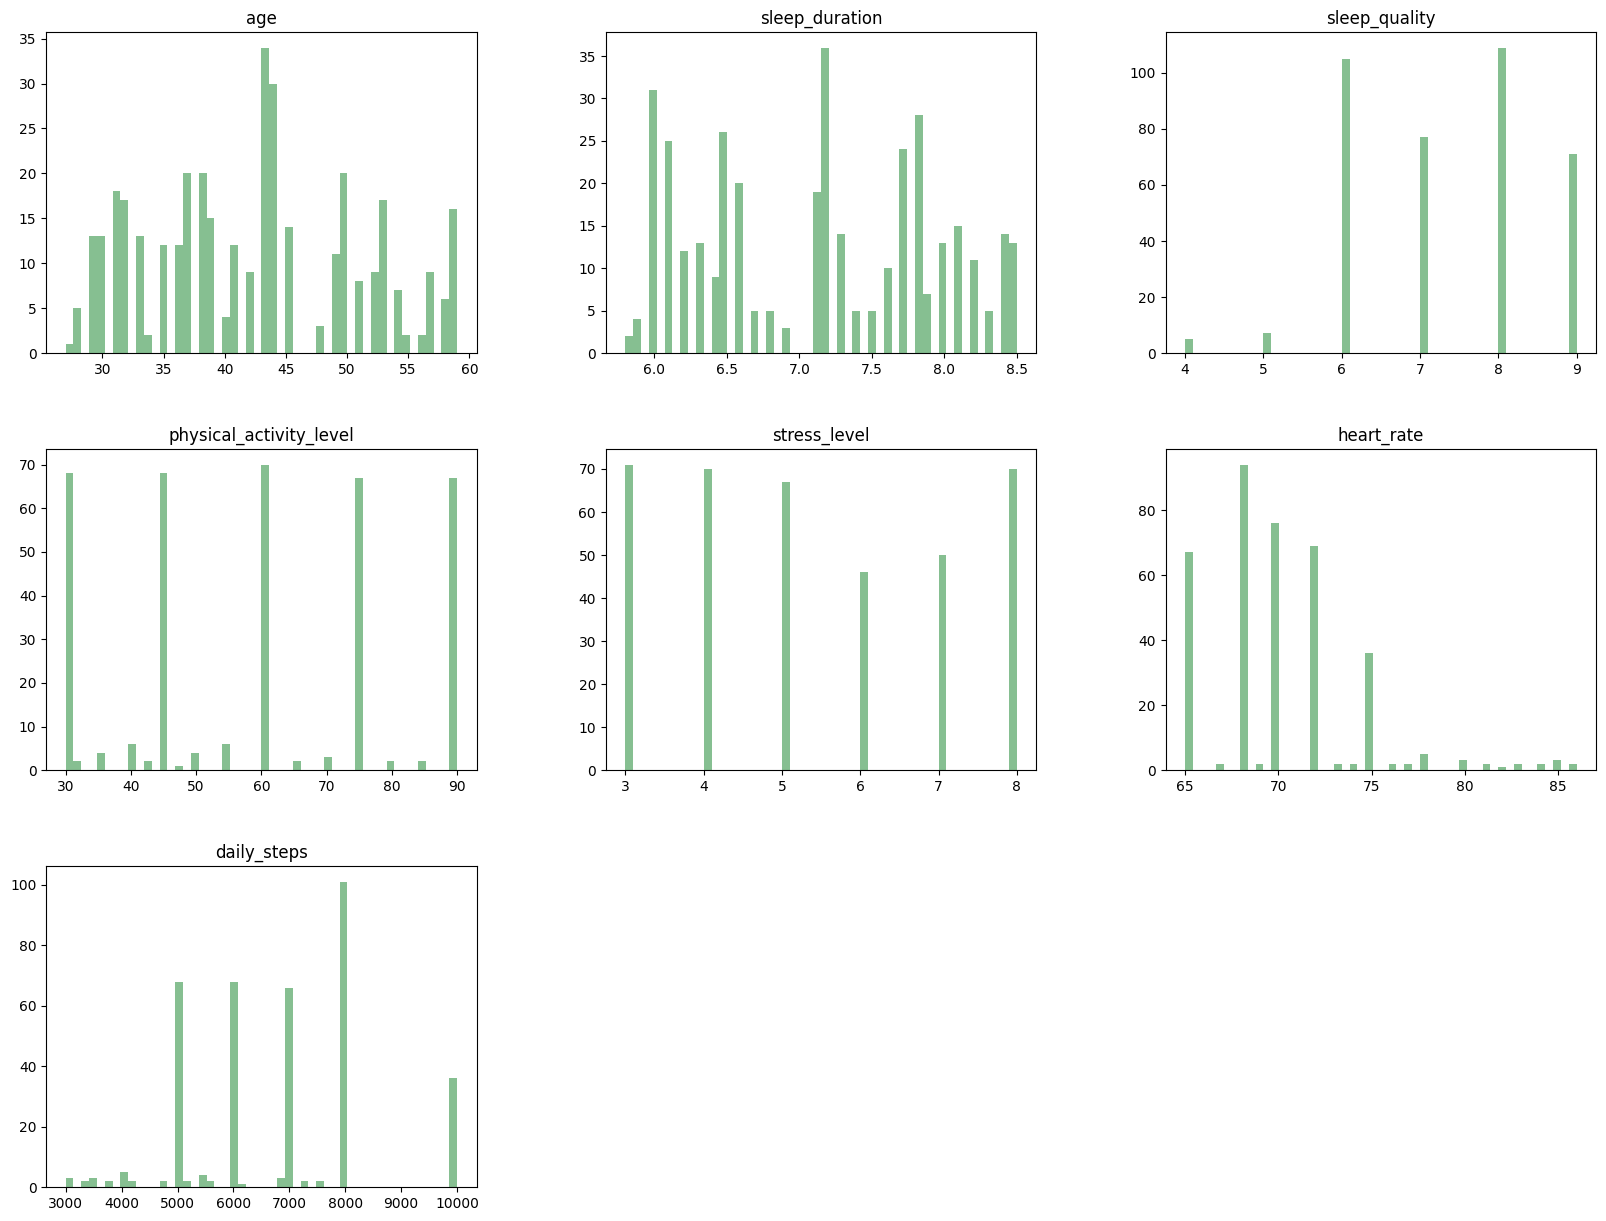

In [15]:
#Let s plot the numerical features
df_numeric = df.drop(columns=['person_id'])
df_numeric.hist(bins = 50,figsize = (20,15),grid=False,color='#86bf91')

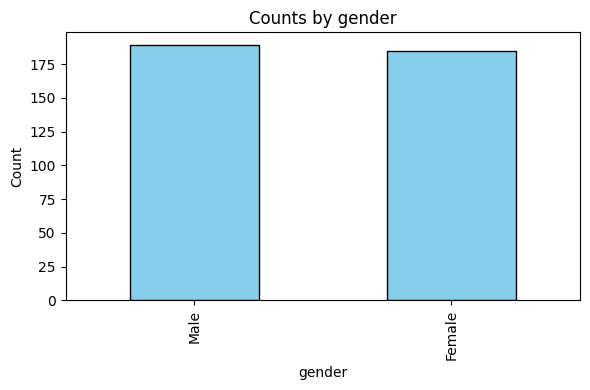

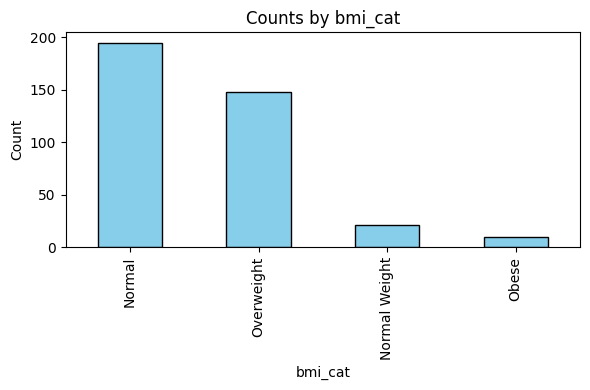

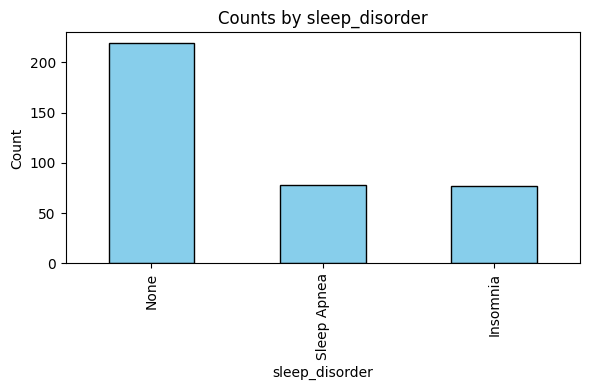

In [16]:
# Let s plot categorical columns
import matplotlib.pyplot as plt
def plot_categorical(df:pd.DataFrame, col:str):
    counts = df[col].value_counts(dropna = False)
    plt.figure(figsize=(6,4))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Counts by {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    
for col in ["gender", "bmi_cat", "sleep_disorder"]:
    plot_categorical(df,col)

In [17]:
import seaborn as sns
def sleep_corr(df: pd.DataFrame, x: str, y: str):
    sns.scatterplot(x = df[x], y = df[y], data=df, palette="coolwarm")
    plt.title(f"{x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

C:\Users\Xaris\AppData\Local\Temp\ipykernel_17852\1032007087.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[x], y = df[y], data=df, palette="coolwarm")


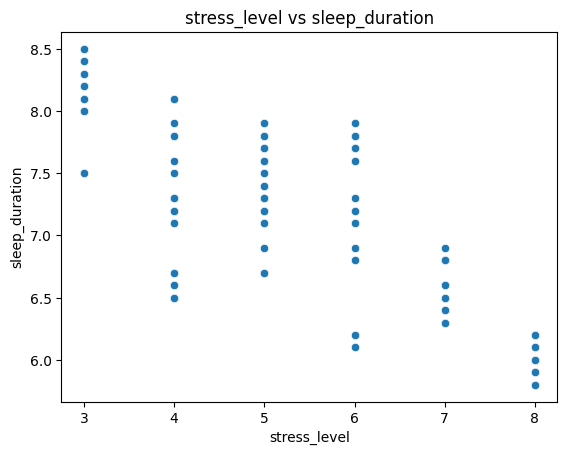

C:\Users\Xaris\AppData\Local\Temp\ipykernel_17852\1032007087.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[x], y = df[y], data=df, palette="coolwarm")


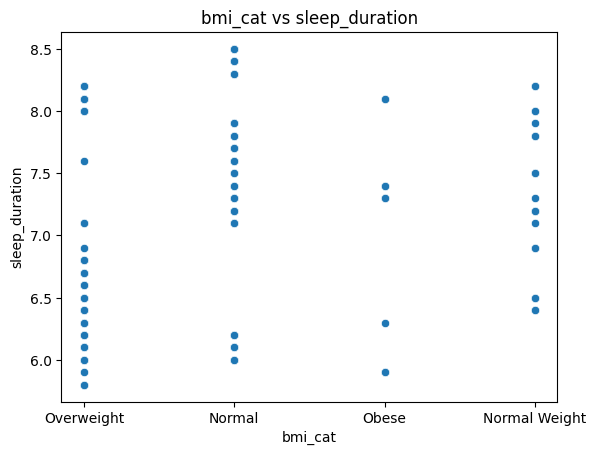

C:\Users\Xaris\AppData\Local\Temp\ipykernel_17852\1032007087.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[x], y = df[y], data=df, palette="coolwarm")


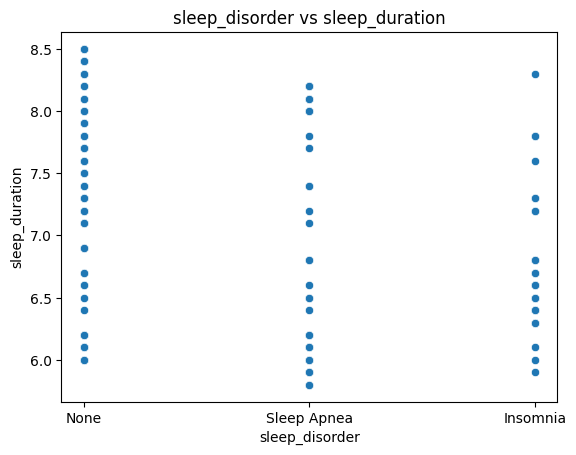

In [18]:
for x in ['stress_level','bmi_cat','sleep_disorder']:
    sleep_corr(df, x, 'sleep_duration')

So from the above correlation diagramms we can see that stress level is higher when sleep duration is less.

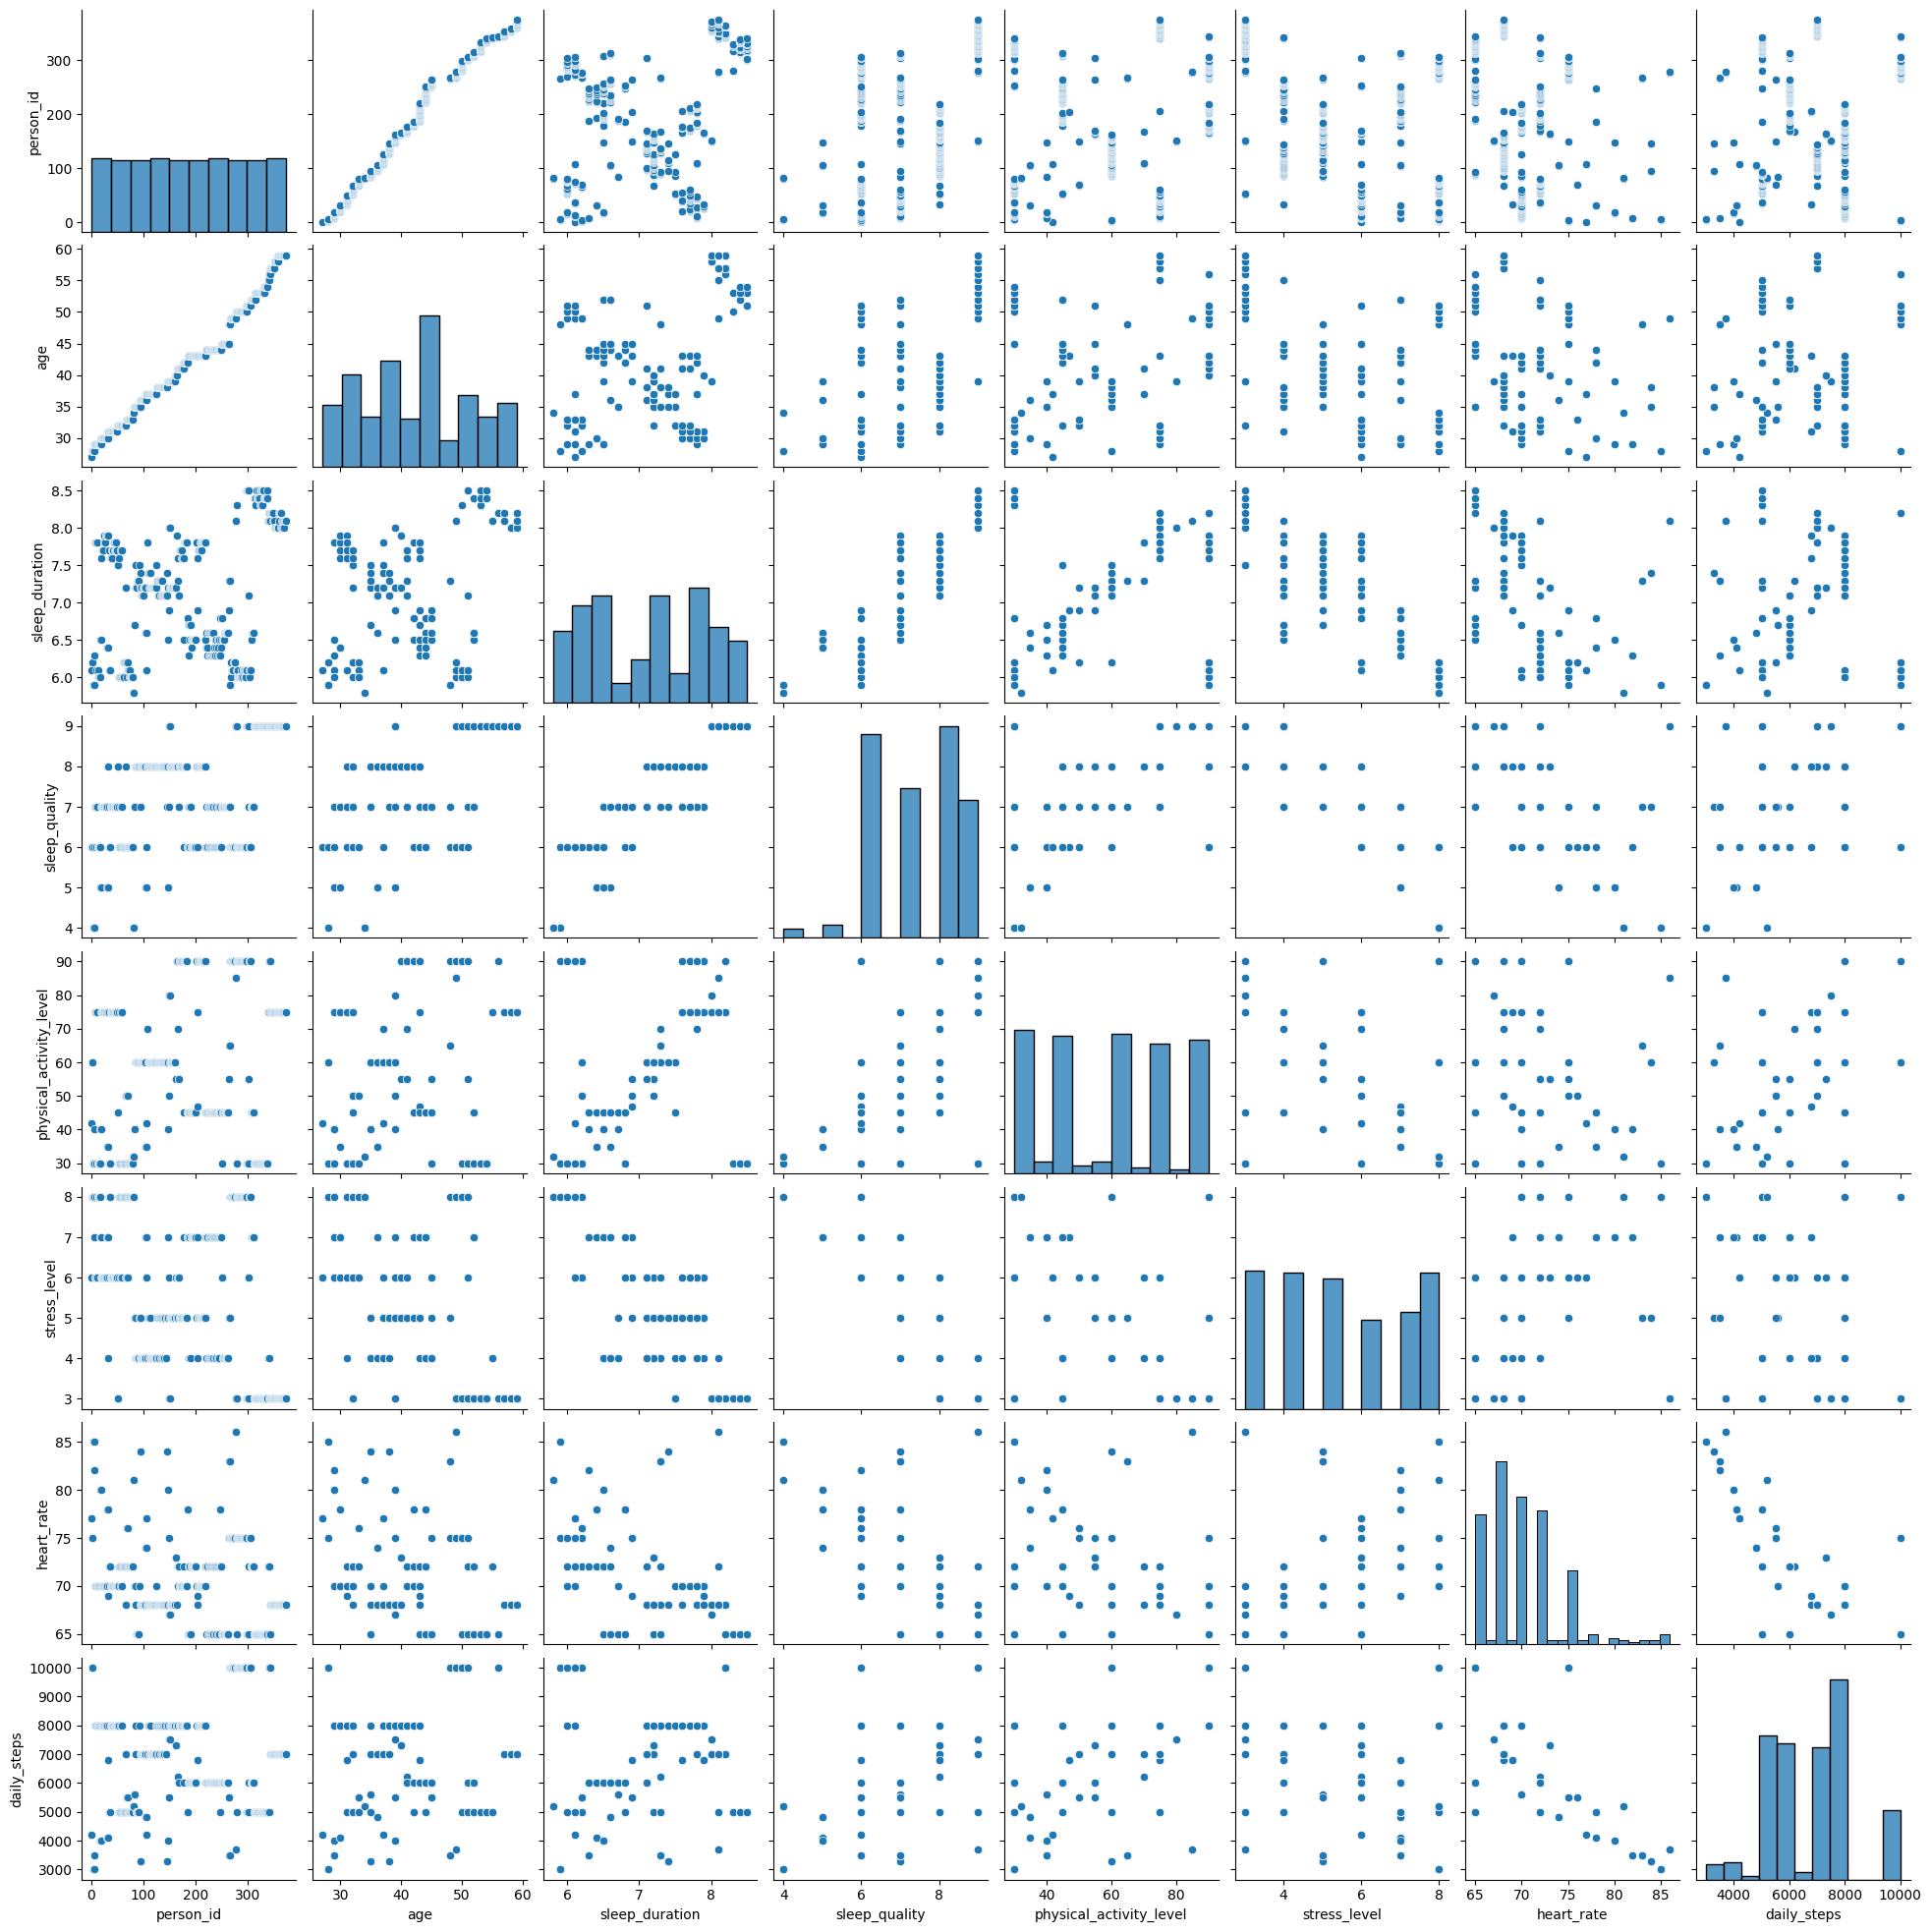

In [19]:
import seaborn as sns
sns.pairplot(df)

In [20]:
df.columns

Index(['person_id', 'gender', 'age', 'occupation', 'sleep_duration',
       'sleep_quality', 'physical_activity_level', 'stress_level', 'bmi_cat',
       'blood_pressure', 'heart_rate', 'daily_steps', 'sleep_disorder'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#Transform categorical variables to numerical

category1 = ['bmi_cat', 'sleep_disorder','occupation']  
category2 = ['gender']

# Ohe for category 1
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = ohe.fit_transform(df[category1])
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(category1))
df = df.drop(columns=category1)
df = pd.concat([df, encoded_df], axis=1)

#Label encoding for category2
le = LabelEncoder()
encoded_data2 = le.fit_transform(df[category2])
df['gender'] = encoded_data2

   person_id  gender  age  sleep_duration  sleep_quality  \
0          1       1   27             6.1              6   
1          2       1   28             6.2              6   
2          3       1   28             6.2              6   
3          4       1   28             5.9              4   
4          5       1   28             5.9              4   

   physical_activity_level  stress_level blood_pressure  heart_rate  \
0                       42             6         126/83          77   
1                       60             8         125/80          75   
2                       60             8         125/80          75   
3                       30             8         140/90          85   
4                       30             8         140/90          85   

   daily_steps  ...  occupation_Doctor  occupation_Engineer  \
0         4200  ...                0.0                  0.0   
1        10000  ...                1.0                  0.0   
2        10000  ...    

c:\Users\Xaris\Desktop\Project\Sleep Health and Lifestyle\Sleep_Health_-_Lifestyle\.myenv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   person_id                        374 non-null    int64  
 1   gender                           374 non-null    int64  
 2   age                              374 non-null    int64  
 3   sleep_duration                   374 non-null    float64
 4   sleep_quality                    374 non-null    int64  
 5   physical_activity_level          374 non-null    int64  
 6   stress_level                     374 non-null    int64  
 7   blood_pressure                   374 non-null    object 
 8   heart_rate                       374 non-null    int64  
 9   daily_steps                      374 non-null    int64  
 10  bmi_cat_Normal Weight            374 non-null    float64
 11  bmi_cat_Obese                    374 non-null    float64
 12  bmi_cat_Overweight    

In [23]:
# feature engineering

df[['systolic','diastolic']] = df['blood_pressure'].str.split("/",expand = True)

df['systolic'] = pd.to_numeric(df['systolic'])
df['diastolic'] = pd.to_numeric(df['diastolic'])

df = df.drop(columns = ['blood_pressure'])

In [24]:
df.head()

,person_id,gender,age,sleep_duration,sleep_quality,physical_activity_level,stress_level,heart_rate,daily_steps,bmi_cat_Normal Weight,...,occupation_Lawyer,occupation_Manager,occupation_Nurse,occupation_Sales Representative,occupation_Salesperson,occupation_Scientist,occupation_Software Engineer,occupation_Teacher,systolic,diastolic
0,1,1,27,6.1,6,42,6,77,4200,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,126,83
1,2,1,28,6.2,6,60,8,75,10000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125,80
2,3,1,28,6.2,6,60,8,75,10000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125,80
3,4,1,28,5.9,4,30,8,85,3000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,140,90
4,5,1,28,5.9,4,30,8,85,3000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,140,90


As we can see from the above table after the encoding techniques we have 26 dimensions (features). This increases the complexity of the data and we should implement techinques in order to prevent curse of dimensionality. So i 

In [32]:
# first of all we need to standardize our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [33]:
scaler.fit(df)

,copy,True
,with_mean,True
,with_std,True


In [34]:
scaled_data = scaler.transform(df)

In [35]:
scaled_data

array([[-1.72742583,  0.9893614 , -1.75309569, ..., -0.34606427,
        -0.33000229, -0.26810236],
       [-1.71816349,  0.9893614 , -1.63764266, ..., -0.34606427,
        -0.45923879, -0.7556402 ],
       [-1.70890116,  0.9893614 , -1.63764266, ..., -0.34606427,
        -0.45923879, -0.7556402 ],
       ...,
       [ 1.70890116, -1.010753  ,  1.94140144, ..., -0.34606427,
         1.47930869,  1.68204901],
       [ 1.71816349, -1.010753  ,  1.94140144, ..., -0.34606427,
         1.47930869,  1.68204901],
       [ 1.72742583, -1.010753  ,  1.94140144, ..., -0.34606427,
         1.47930869,  1.68204901]], shape=(374, 26))

In [ ]:
## Applying PCA algorithm 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # So we transform the 26 Dimensional dataset to 2 Dimensional dataset (26D - > 2D)

data_pca = pca.fit_transform(scaled_data)
data_pca


array([[-2.02818948e+00, -3.13169457e+00],
       [-2.65355121e+00, -2.94765679e+00],
       [-2.65064335e+00, -2.94560051e+00],
       [ 2.32481649e-01, -7.53647769e+00],
       [ 2.35389509e-01, -7.53442141e+00],
       [-8.96771245e-01, -6.24990713e+00],
       [-3.12791033e-01, -4.26727253e+00],
       [-2.97107761e+00, -7.60444438e-01],
       [-2.96816975e+00, -7.58388159e-01],
       [-2.96526189e+00, -7.56331880e-01],
       [-3.21765059e+00, -2.51666665e+00],
       [-2.95944617e+00, -7.52219322e-01],
       [-3.21183487e+00, -2.51255409e+00],
       [-3.20432009e+00, -2.56006351e+00],
       [-3.20141223e+00, -2.55800723e+00],
       [-3.19850436e+00, -2.55595095e+00],
       [ 6.73392543e-01, -3.11423599e+00],
       [-1.80465260e+00, -3.03316023e+00],
       [-7.56352134e-02, -2.94640345e+00],
       [-2.89038384e+00, -8.07987869e-01],
       [-2.89208289e+00, -7.56365889e-01],
       [-2.88917503e+00, -7.54309610e-01],
       [-2.88626717e+00, -7.52253331e-01],
       [-2.

In [40]:
pca.explained_variance_

array([6.11404342, 4.6588764 ])

In [ ]:
pca.explained_variance_ratio_  
# explained_variance_ratio_ is used to capture the variance ratio that explained by PC1 and PC2

array([0.23452676, 0.17870844])

So the total variance ratio that captured from PC1 = 23,45 % and from PC2 = 17,87%. <br>

That means that variance which calculated by summing the explained variance ratios of individual components is the cummulative explained variance. So if we add PC1 + PC2 we get approximately 41 %. <br>

So these two Principal Components explain the 41 % of the total dataset variance. 

It may be necessary to include additional components or apply further preprocessing techniques in order to improve the model’s overall explainability.

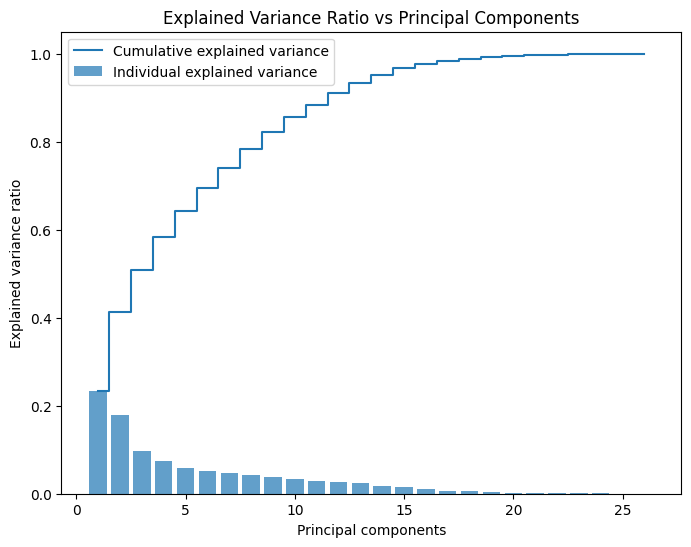

In [45]:
# Let's plot the explained variance ratio and cumulative explained variance for each principal component
pca = PCA()
data_pca = pca.fit_transform(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_  
cum_evr = np.cumsum(explained_variance_ratio)

# plot it

plt.figure(figsize = (8,6))

# plot explained variance ratio

plt.bar(range(1, len(explained_variance_ratio) + 1), 
        explained_variance_ratio, alpha=0.7, align='center', 
        label='Individual explained variance')
# plot cumulative explained variance ratio
plt.step(range(1, len(explained_variance_ratio) + 1), 
         cum_evr, where='mid', 
         label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.title('Explained Variance Ratio vs Principal Components')
plt.show()


From the cumulative explained variance plot, we can observe that the first 10 principal components capture approximately 80% of the total variance in the dataset. Therefore, by retaining the first 10 components, we can preserve most of the information while significantly reducing the dataset’s dimensionality.